#DATOS DE MERCADEO DE VALORES (NASDAQ Composite)

> Divisa en USD

> Intervalo de fechas 2010-09-24 - 2021-09-24

> Frecuencia Diario

##Importando librerías

In [254]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing  #para normalizar los datos antes de aplicar al algoritmo
from sklearn.metrics import pairwise_distances_argmin_min

import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D

#from wikitables import import_tables    # para descargar tablas de Wikipedia
from sklearn.decomposition import PCA   # Análisis de componentes principales (PCA).

#configuraciones basicas para PLT
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

##Importando dataset

In [285]:
df = pd.read_csv("https://raw.githubusercontent.com/Julianjimenez98/DeepLearning/main/%5EIXIC.csv")
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010-09-27,2379729980,2386010010,2368649902,2369770020,2369770020,1873120000
1,2010-09-28,2373129883,2383669922,2339500000,2379590088,2379590088,2125730000
2,2010-09-29,2372370117,2382149902,2366189941,2376560059,2376560059,2077930000
3,2010-09-30,2390959961,2400060059,2354219971,2368620117,2368620117,2418300000
4,2010-10-01,2386820068,2389449951,2359320068,2370750000,2370750000,1932650000


## Conociendo y Preprocesando los datos


In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       2769 non-null   object
 1   Open       2769 non-null   int64 
 2   High       2769 non-null   int64 
 3   Low        2769 non-null   int64 
 4   Close      2769 non-null   int64 
 5   Adj_Close  2769 non-null   int64 
 6   Volume     2769 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 151.6+ KB


In [287]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64

##Cambiando el tipo de dato en columnas

In [288]:
df['Open']=df['Open'].astype(float)
df['High']=df['High'].astype(float)
df['Low']=df['Low'].astype(float)
df['Close']=df['Close'].astype(float)
df['Adj_Close']=df['Adj_Close'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2769 entries, 0 to 2768
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2769 non-null   object 
 1   Open       2769 non-null   float64
 2   High       2769 non-null   float64
 3   Low        2769 non-null   float64
 4   Close      2769 non-null   float64
 5   Adj_Close  2769 non-null   float64
 6   Volume     2769 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 151.6+ KB


In [289]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2010-09-27,2.379730e+09,2.386010e+09,2.368650e+09,2.369770e+09,2.369770e+09,1873120000
1,2010-09-28,2.373130e+09,2.383670e+09,2.339500e+09,2.379590e+09,2.379590e+09,2125730000
2,2010-09-29,2.372370e+09,2.382150e+09,2.366190e+09,2.376560e+09,2.376560e+09,2077930000
3,2010-09-30,2.390960e+09,2.400060e+09,2.354220e+09,2.368620e+09,2.368620e+09,2418300000
4,2010-10-01,2.386820e+09,2.389450e+09,2.359320e+09,2.370750e+09,2.370750e+09,1932650000


##Definiendo que columnas usaemos para el ejercicio

In [290]:
df=df[['Date','High','Low']]
df.head()

,Date,High,Low
0,2010-09-27,2.386010e+09,2.368650e+09
1,2010-09-28,2.383670e+09,2.339500e+09
2,2010-09-29,2.382150e+09,2.366190e+09
3,2010-09-30,2.400060e+09,2.354220e+09
4,2010-10-01,2.389450e+09,2.359320e+09


##Normalización de los datos usando como base la fecha (W)

In [291]:
df['Date'] = pd.to_datetime(df['Date'])

In [292]:
df_weekly = df.resample('W', on='Date').sum()
df_weekly.head()

,High,Low
Date,,
2010-10-03,1.194134e+10,1.178788e+10
2010-10-10,1.197183e+10,1.180573e+10
2010-10-17,1.220198e+10,1.206358e+10
2010-10-24,1.237514e+10,1.222153e+10
2010-10-31,1.254911e+10,1.243386e+10


##Método para graficar

In [293]:
def plot_stock(symbol, df=df_weekly):
    df[symbol].plot(alpha=0.9);

##Graficando los datos

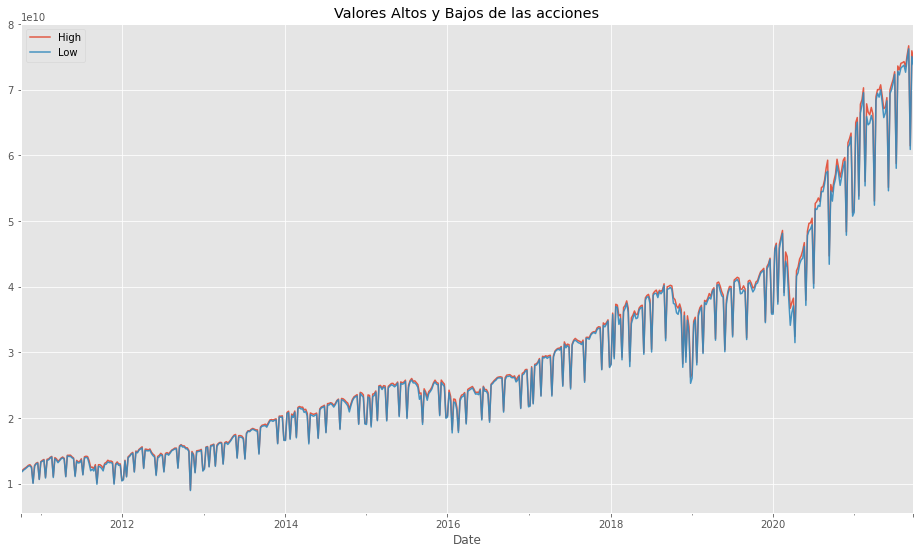

In [295]:
plot_stock('High')
plot_stock('Low')
plt.title('Valores Altos y Bajos de las acciones')
plt.legend();

##Calcular los rendimientos para que podamos comparar las acciones

In [296]:
start = df_weekly.iloc[0]  #traemos la primera fila y la volvemos un vector
#calculamos el valor del retorno de la acción
returns = (df_weekly - start) / start
returns

,High,Low
Date,,
2010-10-03,0.000000,0.000000
2010-10-10,0.002553,0.001514
2010-10-17,0.021827,0.023388
2010-10-24,0.036328,0.036788
2010-10-31,0.050896,0.054800
...,...,...
2021-08-29,5.302634,5.333639
2021-09-05,5.423247,5.467568
2021-09-12,4.147298,4.166864


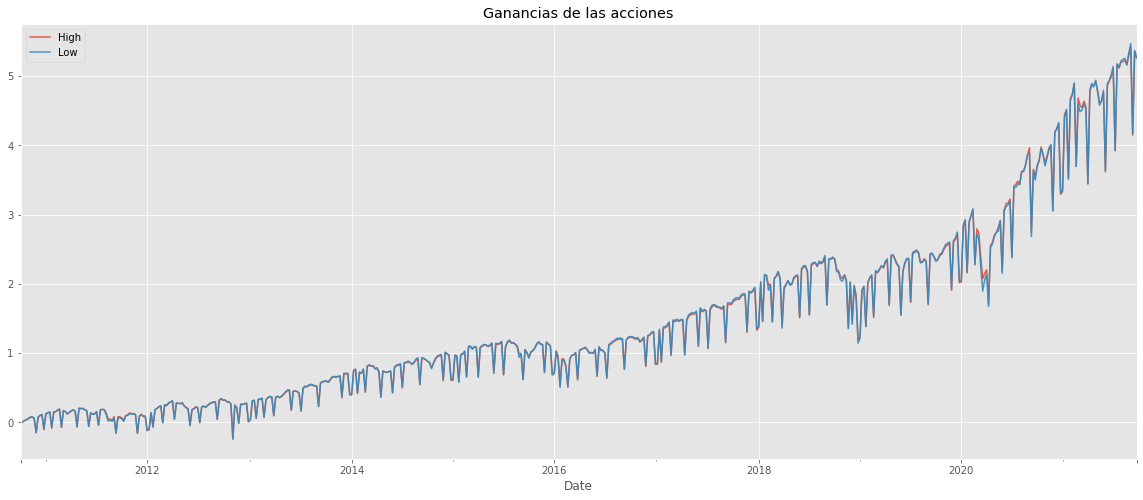

In [297]:
plt.figure(figsize = (20,8))
plot_stock('High', df=returns)
plot_stock('Low', df=returns)
plt.title('Ganancias de las acciones')
plt.legend();

#Utilizando K-MEANS

##Normalizamos los datos

###Eliminando columnas que no necesitaremos (por ahora)

In [298]:
df = df.dropna()
df = df.reset_index(drop=True)

In [299]:
# Eliminamos columna de fecha que no usaremos en el algoritmo.
dates = df['Date'] # Guardamos la columna Date.
df = df.drop('Date', 1) # Borramos la columna del dataframe.

In [300]:
#%% Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
df_escalado = min_max_scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado) # Hay que convertir a DF el resultado.
df_escalado = df_escalado.rename(columns = {0: 'High', 1: 'Low'})

In [301]:
df_escalado.head()
df_escalado.isnull().sum()

High    0
Low     0
dtype: int64

##Representación gráfica de los datos

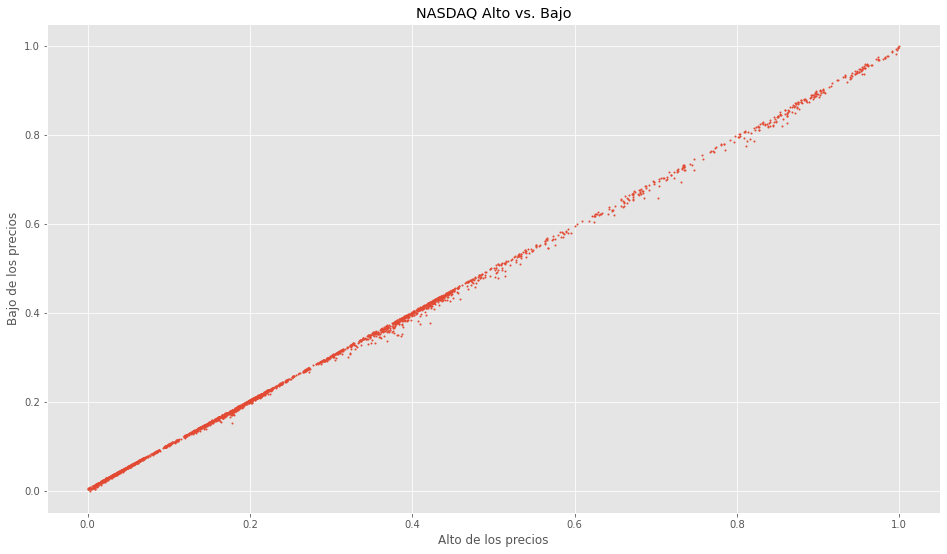

In [302]:
#%% Representación gráfica de los datos.
x = df_escalado['High'].values
y = df_escalado['Low'].values
plt.xlabel('Alto de los precios')
plt.ylabel('Bajo de los precios')
plt.title('NASDAQ Alto vs. Bajo')
plt.plot(x,y,'o',markersize=1)
plt.show()

##Aplicación de K-MEANS

###Realizar una gráfica de codo

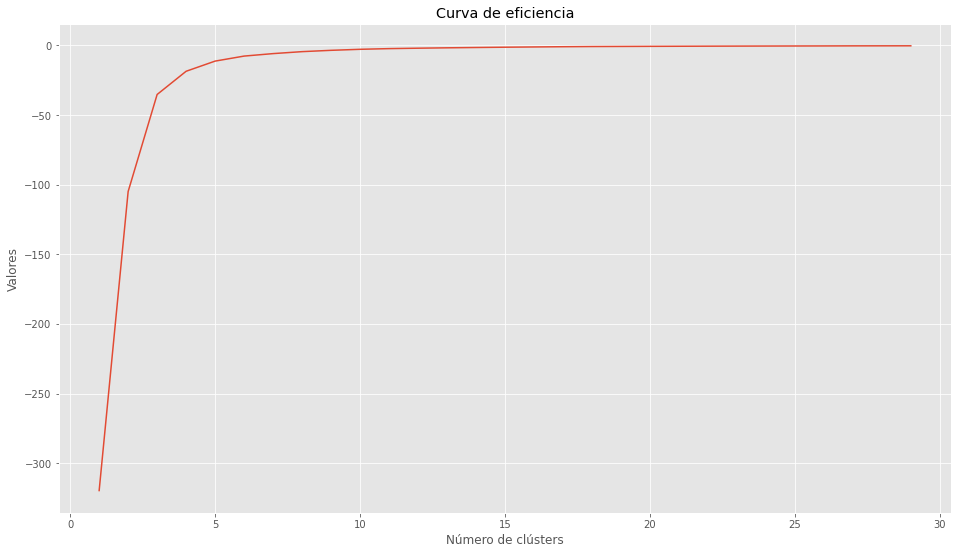

In [303]:
Nc = range(1, 30) 
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(df_escalado).score(df_escalado) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clústers')
plt.ylabel('Valores')
plt.title('Curva de eficiencia')
plt.show()

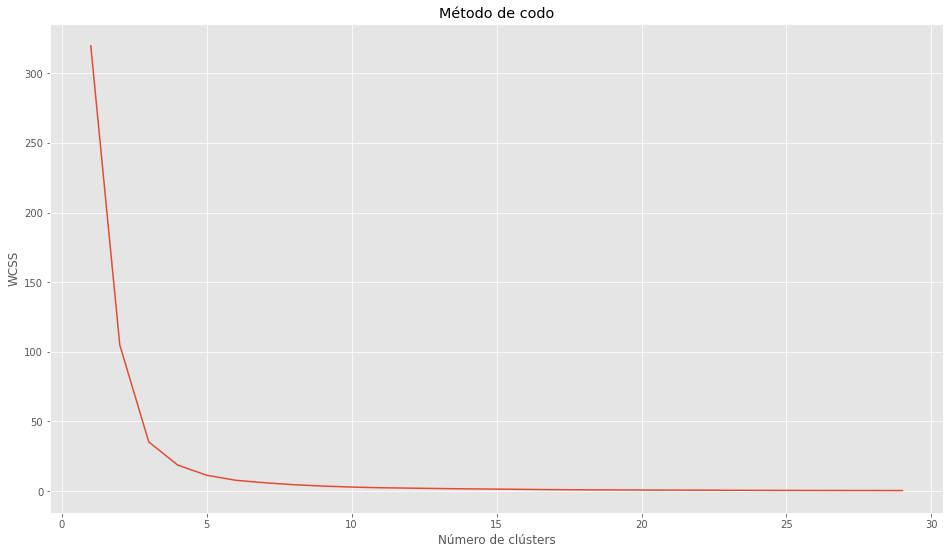

In [304]:
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_escalado)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('Método de codo')
plt.xlabel('Número de clústers')
plt.ylabel('WCSS')
plt.show()

##Conocer los centroides

In [305]:
kmeans = KMeans(n_clusters=5).fit(df_escalado)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.39544202 0.39310228]
 [0.04636988 0.04921505]
 [0.88685258 0.8785628 ]
 [0.19296902 0.19452874]
 [0.62831775 0.62022468]]


##Etiquetado de datos

In [306]:
#%% Etiquetamos nuestro dataframe.
labels = kmeans.predict(df_escalado)   #generamos las etiquetas de cada clouster
df['label'] = labels                   #añadimos la columna “label” a nuestro dataframe original

df.insert(0, 'Date', dates)           #%% Añadimos la columna de fecha

In [307]:
df.head()

,Date,High,Low,label
0,2010-09-27,2.386010e+09,2.368650e+09,1
1,2010-09-28,2.383670e+09,2.339500e+09,1
2,2010-09-29,2.382150e+09,2.366190e+09,1
3,2010-09-30,2.400060e+09,2.354220e+09,1
4,2010-10-01,2.389450e+09,2.359320e+09,1


##Representación gráfica de los clústers K-MEANS

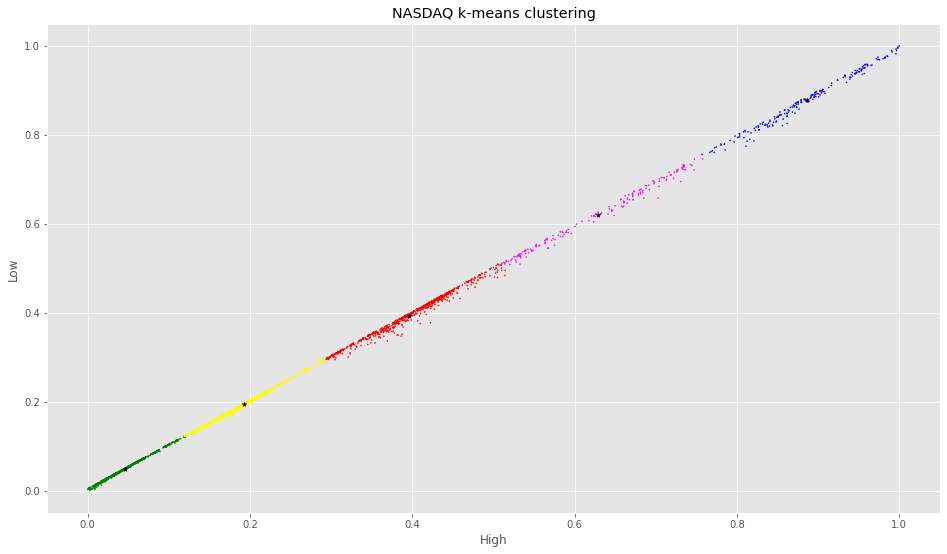

In [308]:
#%% Plot k-means clustering.
colores=['red','green','blue','yellow','fuchsia']
asignar=[]
for row in labels:
     asignar.append(colores[row])
plt.scatter(x, y, c=asignar, s=1)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='black', s=20) # Marco centroides.
plt.xlabel('High')
plt.ylabel('Low')
plt.title('NASDAQ k-means clustering')
plt.show()

##Grupos y centroides

In [309]:
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','yellow','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])

In [310]:
f1 = df['High'].values
f2 = df['Low'].values

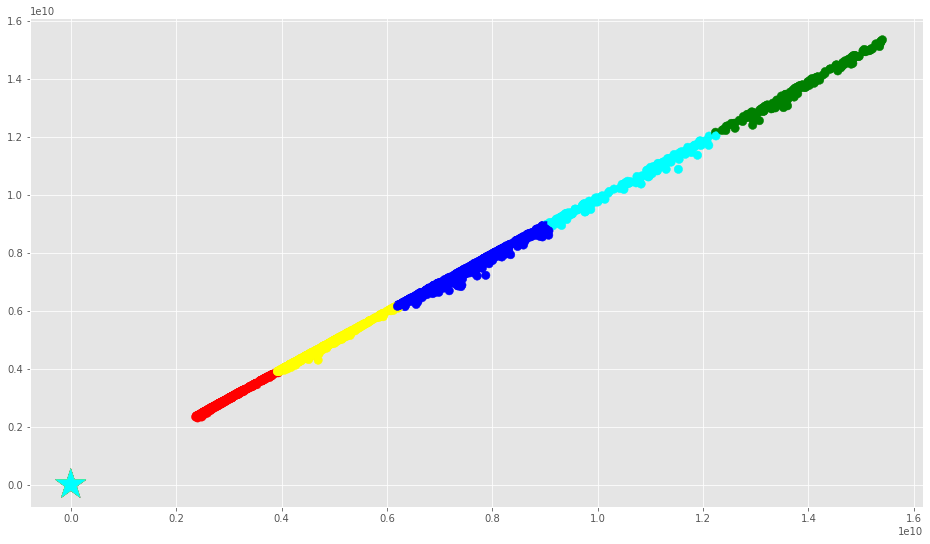

In [311]:
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [312]:
copy =  pd.DataFrame()
copy['High']=df['High'].values
copy['Low']=df['Low'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,blue,696
1,red,775
2,green,207
3,yellow,912
4,cyan,179
